In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-on Activity 13.2: Polynomial Regression

## Objectives

+ To introduce polynomial regression

## An example where things work as expected

We take up where we left in the previous hands-on activity.
Let's try to fit a linear regression model to data generated from:
$$
y_i = -0.5 + 2x_i + 2x_i^2 + \epsilon_i,
$$
where $\epsilon_i \sim N(0, 1)$ and where we sample $x_i \sim U([-1,1])$:

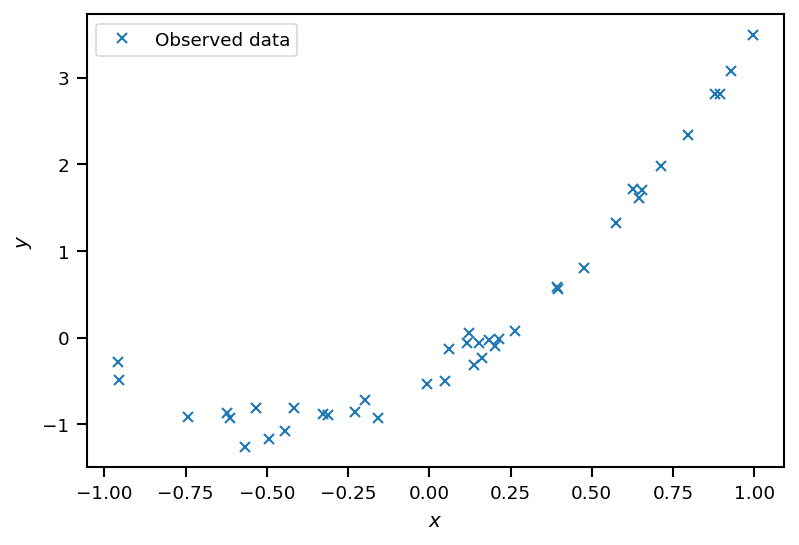

In [17]:
# How many observations we have
num_obs = 40
x = -1.0 + 2 * np.random.rand(num_obs)
w0_true = -0.5
w1_true = 2.0
w2_true = 2.0
sigma_true = 0.1
y = w0_true + w1_true * x + w2_true * x ** 2 + sigma_true * np.random.randn(num_obs)
# Let's plot the data
fig, ax = plt.subplots(dpi=150)
ax.plot(x, y, 'x', label='Observed data')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

We already saw that the linear model does not work here.
We need to try to fit a quadratic model:
$$
y = w_0 + w_1 x + w_2 x^2,
$$
by minimizing the square loss:
$$
L(\mathbf{w}) = \sum_{i=1}^N(y_i - w_0 - w_1 x_i - w_2 x_i^2)^2 = \parallel \mathbf{y} - \mathbf{X}\mathbf{w}\parallel_2^2,
$$
where $\mathbf{y} = (y_1,\dots,y_N)$ is the vector of observations, $\mathbf{w} = (w_0, w_1)$ is the weight vector, and the $N\times 2$ *design matrix* $\mathbf{X}$ is:
$$
\mathbf{X} = 
\begin{bmatrix} 
1 & x_1 & x_1^2\\
1 & x_2 & x_2^2\\
\vdots & \vdots \\
1 & x_N & x_N^2
\end{bmatrix}.
$$
As before, to solve the least squares problems numerically, we need to for $\mathbf{X}$.
Here we go:

In [18]:
X = np.hstack([np.ones((num_obs, 1)), x.reshape((num_obs, 1)), x.reshape((num_obs, 1)) ** 2])

and then:

In [19]:
# It returns quite a few things that we haven't explained yet, which are going to ignore
w, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
print('w_0 = {0:1.2f}'.format(w[0]))
print('w_1 = {0:1.2f}'.format(w[1]))
print('w_2 = {0:1.2f}'.format(w[2]))

w_0 = -0.50
w_1 = 1.96
w_2 = 2.06


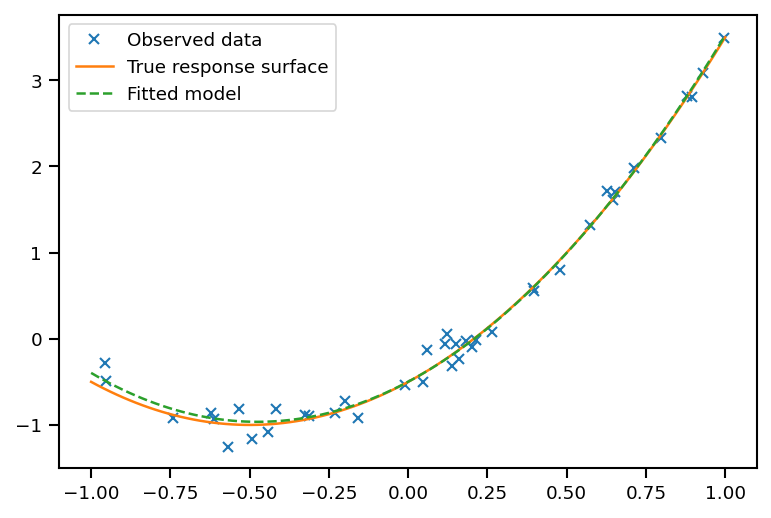

In [20]:
fig, ax = plt.subplots(dpi=150)
# Some points on which to evaluate the regression function
xx = np.linspace(-1, 1, 100)
# The true connection between x and y
yy_true = w0_true + w1_true * xx + w2_true * xx ** 2
# The model we just fitted
yy = w[0] + w[1] * xx + w[2] * xx ** 2
# plot the data again
ax.plot(x, y, 'x', label='Observed data')
# overlay the true 
ax.plot(xx, yy_true, label='True response surface')
# overlay our prediction
ax.plot(xx, yy, '--', label='Fitted model')
plt.legend(loc='best');

## Questions

+ Repeat with very small ``num_obs`` and very large ``num_obs`` and observe the behavior of the fit.

## Overfitting

What would have happened if we tried to use a higher degree polynomial.
Let's write some code that can try to fit a polynomial of any degree.
To achieve this, we need to be able to evaluate a design matrix of the form:
$$
\mathbf{X} = 
\begin{bmatrix} 
1 & x_1 & x_1^2\dots & x_1^\rho\\
1 & x_2 & x_2^2\dots & x_2^\rho\\
\vdots & \vdots\dots & \vdots\\
1 & x_N & x_N^2 \dots & x_N^\rho
\end{bmatrix},
$$
where $\rho$ is the degree of the polynomial.
We need to write some code for this:

In [21]:
def get_polynomial_design_matrix(x, degree):
    """
    Returns the polynomial design matrix of ``degree`` evaluated at ``x``.
    """
    # Make sure this is a 2D numpy array with only one column
    assert isinstance(x, np.ndarray), 'x is not a numpy array.'
    assert x.ndim == 2, 'You must make x a 2D array.'
    assert x.shape[1] == 1, 'x must be a column.'
    # Start with an empty list where we are going to put the columns of the matrix
    cols = []
    # Loop over columns and add the polynomial
    for i in range(degree+1):
        cols.append(x ** i)
    return np.hstack(cols)

Let's try fitting a degree 3 polynomial and see what we get:

In [28]:
degree = 60
# The design matrix is:
X = get_polynomial_design_matrix(x[:, None], degree)
# And we fit just like previously:
w, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
print('w = ', w)

w =  [-5.67414998e-01 -3.16966216e-01  9.90355058e+01  6.30086449e+02
 -1.19299631e+04 -4.56006659e+04  5.77698304e+05  1.52663930e+06
 -1.45706989e+07 -2.85172299e+07  2.16075338e+08  3.24188718e+08
 -2.01081400e+09 -2.34044747e+09  1.21236010e+10  1.08528701e+10
 -4.74641524e+10 -3.16199372e+10  1.16065151e+11  5.33762562e+10
 -1.54466375e+11 -3.94117042e+10  5.00097409e+10 -8.99450001e+09
  1.07019195e+11  1.93265538e+10 -3.68090962e+10  5.27931126e+09
 -1.02417119e+11 -4.32867612e+08 -3.35413847e+10  8.63092428e+09
  5.65624022e+10  6.65444235e+09  8.21935550e+10 -1.35614849e+10
  4.48084288e+10 -3.50348560e+10 -1.00879070e+10 -3.79270284e+10
 -4.39009529e+10 -1.71801078e+10 -4.54383489e+10  1.66144620e+10
 -2.55695607e+10  4.65937553e+10 -2.63758513e+09  5.89174567e+10
  9.22784969e+09  4.85546539e+10  5.71823849e+09  2.01346969e+10
 -8.18698754e+09 -1.48806871e+10 -2.12157588e+10 -4.17028227e+10
 -1.99388508e+10 -4.60744031e+10  8.05139600e+09 -1.63901466e+10
  7.20775605e+10]


Let's visualize the fit.
Notice, that for making predictions I am evaluating the design matrix on the points I want to make predictions at.

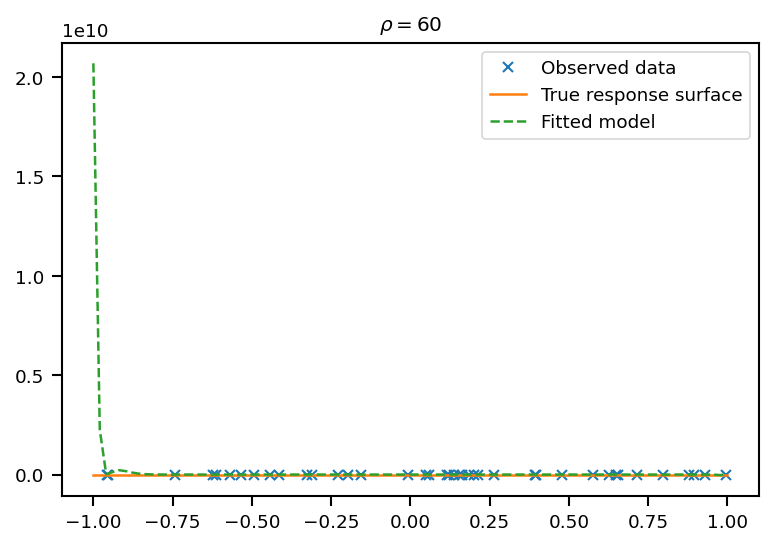

In [29]:
fig, ax = plt.subplots(dpi=150)
# Some points on which to evaluate the regression function
xx = np.linspace(-1, 1, 100)
# The true connection between x and y
yy_true = w0_true + w1_true * xx + w2_true * xx ** 2
# The model we just fitted
XX = get_polynomial_design_matrix(xx[:, None], degree)
yy = np.dot(XX, w)
# plot the data again
ax.plot(x, y, 'x', label='Observed data')
# overlay the true 
ax.plot(xx, yy_true, label='True response surface')
# overlay our prediction
ax.plot(xx, yy, '--', label='Fitted model')
ax.set_title(r'$\rho = {0:d}$'.format(degree))
plt.legend(loc='best');

## Questions

+ Start increasing the polynomial degree from 3, to 4, to a number where things get bad... You will soon start *overfitting*.